In [1]:
import numpy as np
import pandas as pd

# stats
from scipy import stats

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Histgram

(array([ 5.,  7., 17., 18., 23., 14.,  9.,  5.,  1.,  1.]),
 array([-2.07096305, -1.5547284 , -1.03849374, -0.52225908, -0.00602443,
         0.51021023,  1.02644488,  1.54267954,  2.0589142 ,  2.57514885,
         3.09138351]),
 <a list of 10 Patch objects>)

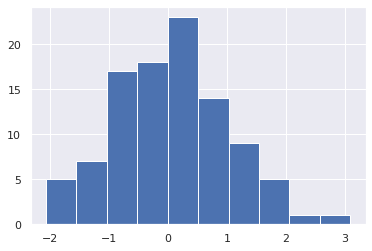

In [2]:
dataset1 = np.random.randn(100)
plt.hist(dataset1)

(array([ 3.,  4.,  8., 16., 13., 14., 11.,  7.,  2.,  2.]),
 array([-2.09542506, -1.64990202, -1.20437898, -0.75885595, -0.31333291,
         0.13219012,  0.57771316,  1.0232362 ,  1.46875923,  1.91428227,
         2.3598053 ]),
 <a list of 10 Patch objects>)

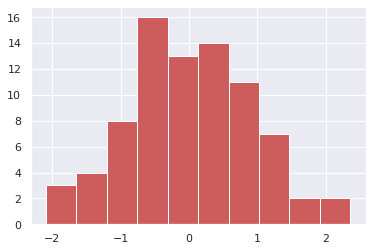

In [3]:
dataset2 = np.random.randn(80)
plt.hist(dataset2, color='indianred')

(array([0.11222764, 0.05611382, 0.11222764, 0.11222764, 0.05611382,
        0.39279675, 0.33668293, 0.56113821, 0.33668293, 0.39279675,
        0.33668293, 0.44891057, 0.33668293, 0.28056911, 0.28056911,
        0.11222764, 0.05611382, 0.05611382, 0.05611382, 0.05611382]),
 array([-2.09542506, -1.87266354, -1.64990202, -1.4271405 , -1.20437898,
        -0.98161747, -0.75885595, -0.53609443, -0.31333291, -0.09057139,
         0.13219012,  0.35495164,  0.57771316,  0.80047468,  1.0232362 ,
         1.24599771,  1.46875923,  1.69152075,  1.91428227,  2.13704379,
         2.3598053 ]),
 <a list of 20 Patch objects>)

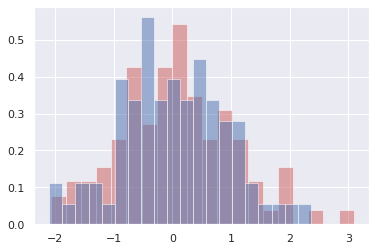

In [4]:
plt.hist(dataset1, density=True, color='indianred', alpha=.5, bins=20)
plt.hist(dataset2, density=True, alpha=.5, bins=20)

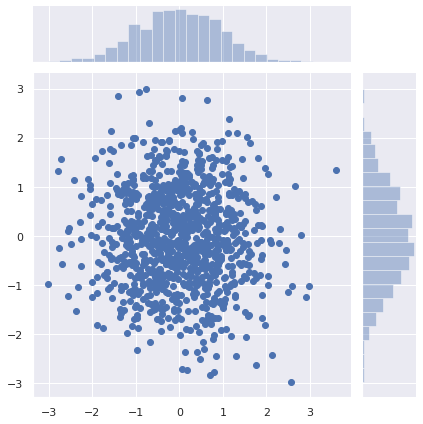

In [5]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

sns.jointplot(data1, data2)

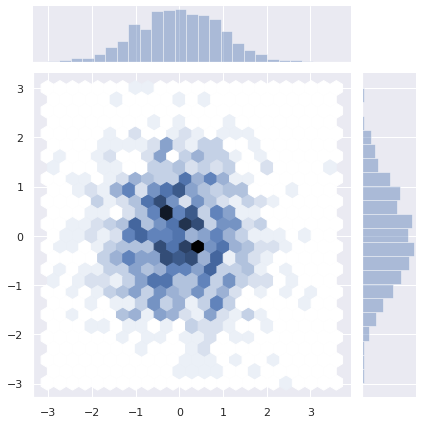

In [6]:
sns.jointplot(data1, data2, kind='hex')

# Kernel Density Estimation plot

(0, 1)

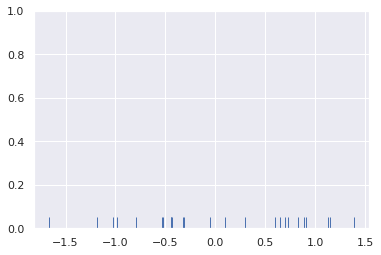

In [7]:
dataset = np.random.randn(25)
sns.rugplot(dataset)
plt.ylim(0, 1)

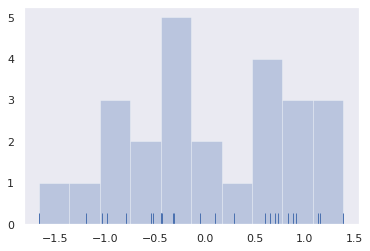

In [8]:
plt.figure()
plt.grid()
plt.hist(dataset, alpha=.3)
sns.rugplot(dataset)

(0, 1)

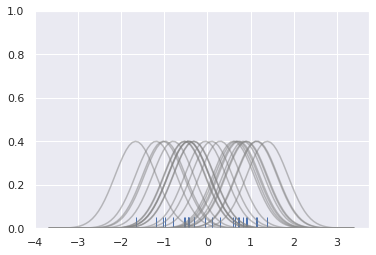

In [9]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((5*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)
    

Text(0.5, 0.98, 'Sum of the basis functions')

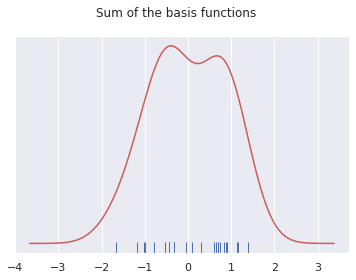

In [10]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

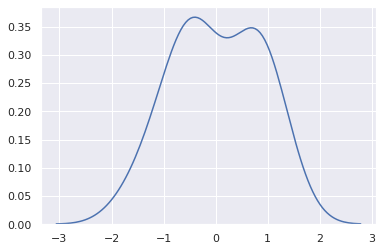

In [11]:
sns.kdeplot(dataset)

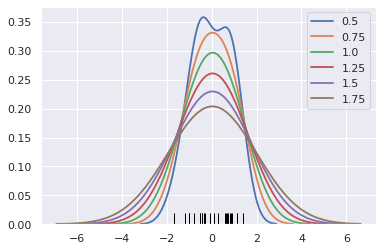

In [12]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

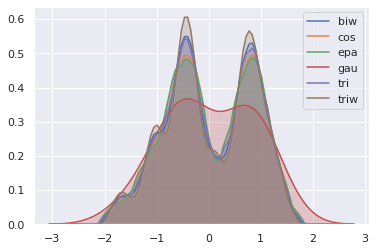

In [13]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

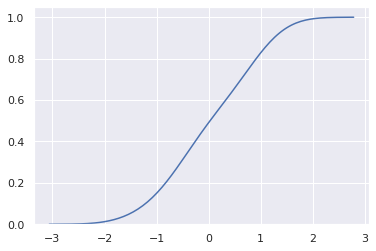

In [14]:
sns.kdeplot(dataset, cumulative=True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


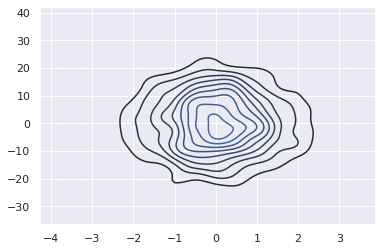

In [15]:
mean = [0,0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])

sns.kdeplot(dframe)

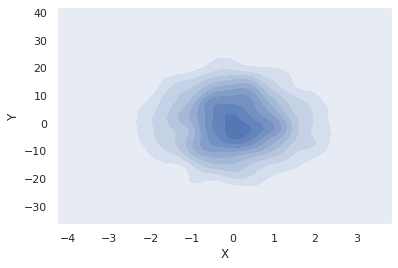

In [16]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

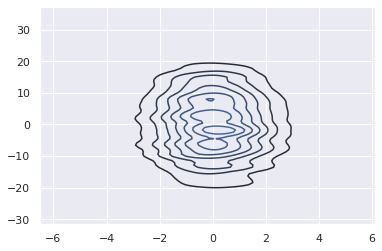

In [17]:
sns.kdeplot(dframe, bw=1)

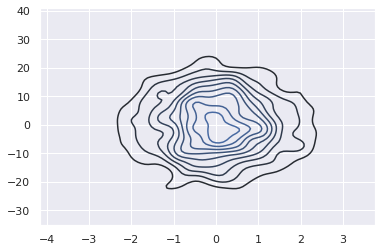

In [18]:
sns.kdeplot(dframe, bw='silverman')

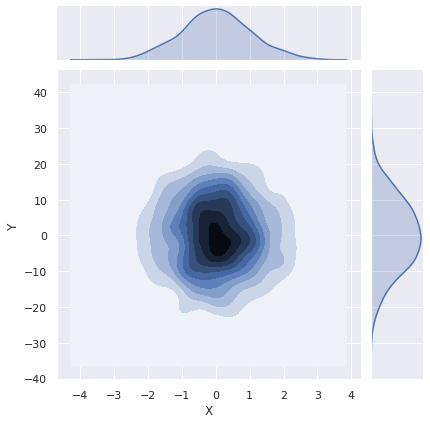

In [19]:
sns.jointplot('X', 'Y', dframe, kind='kde')

# Combining plot styles

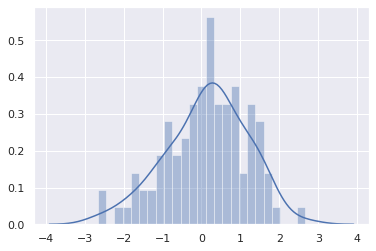

In [20]:
dataset = np.random.randn(100)

sns.distplot(dataset, bins=25)

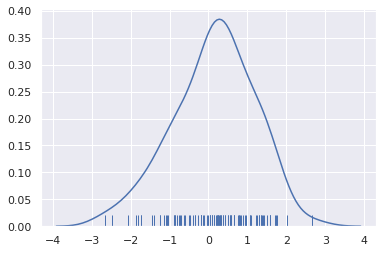

In [21]:
sns.distplot(dataset, bins=25, rug=True, hist=False)

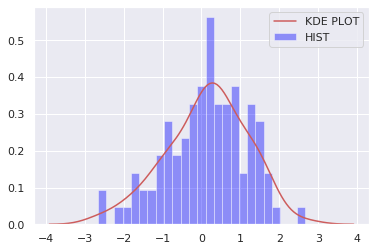

In [22]:
sns.distplot(dataset, bins=25,
           kde_kws={'color': 'indianred', 'label': 'KDE PLOT'},
           hist_kws={'color': 'blue', 'label': 'HIST'})

In [23]:
ser1 = pd.Series(dataset, name='My_data')
ser1

0     1.226696
1    -1.100623
2     1.346473
3     0.040403
4     0.568796
        ...   
95    1.384620
96    1.771924
97   -0.277267
98    0.556873
99    2.664902
Name: My_data, Length: 100, dtype: float64

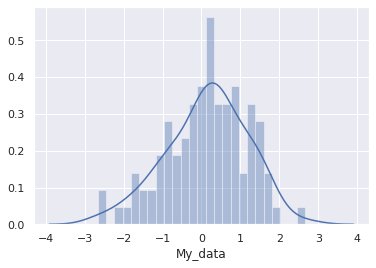

In [24]:
sns.distplot(ser1, bins=25)

# Box and Violin plots

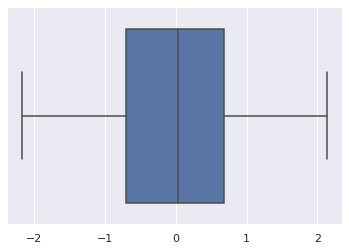

In [25]:
sns.set()
data1 = np.random.randn(100)
data2 = np.random.randn(100)

sns.boxplot([data1, data2])

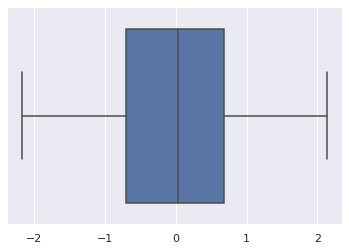

In [26]:
sns.boxplot([data1, data2], whis=np.inf)

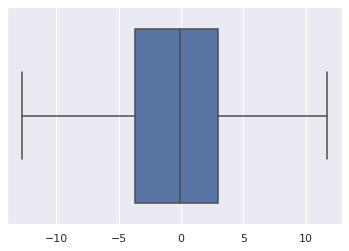

In [27]:
#Normal Dist
data1 = stats.norm(0, 5).rvs(100)

# Two gamma dist. Concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                       -1*stats.gamma(5).rvs(50)])

# Box plot both data1 and data2
sns.boxplot([data1, data2], whis=np.inf)

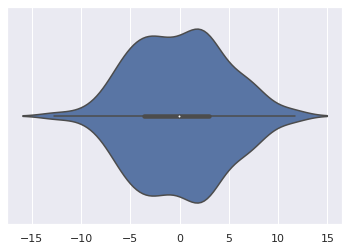

In [28]:
sns.violinplot([data1, data2])

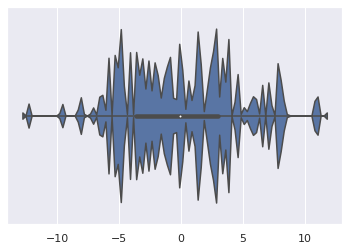

In [29]:
sns.violinplot([data1, data2], bw=0.01)

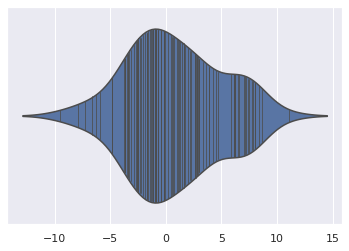

In [30]:
sns.violinplot(data1, inner='stick')

# Regression Plot

In [31]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


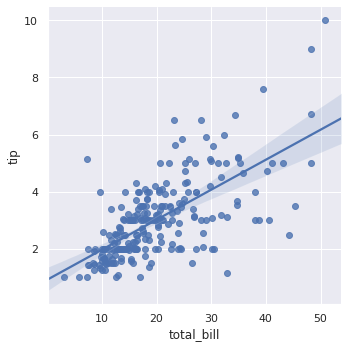

In [32]:
sns.lmplot('total_bill', 'tip', tips)

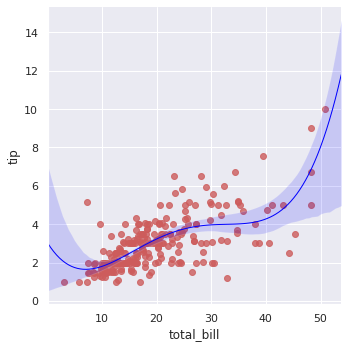

In [33]:
sns.lmplot('total_bill', 'tip', tips, order=4,
          scatter_kws={'marker': 'o', 'color': 'indianred'},
          line_kws={'linewidth':1, 'color':'blue'})

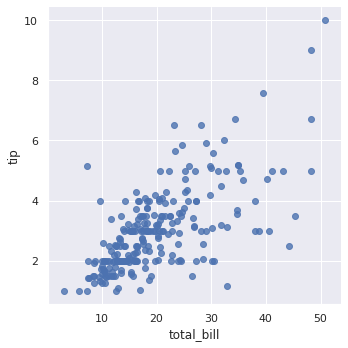

In [34]:
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tips['tip_pect'] = 100*(tips['tip'] / tips['total_bill'])

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


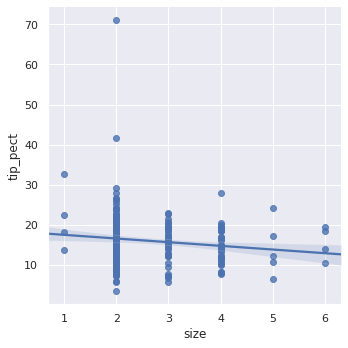

In [38]:
sns.lmplot('size', 'tip_pect', tips)

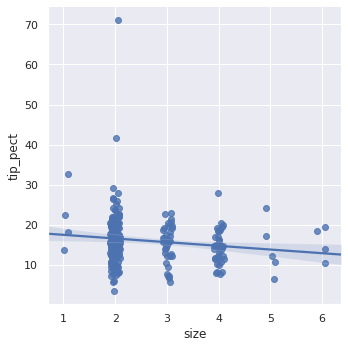

In [39]:
sns.lmplot('size', 'tip_pect', tips, x_jitter=.1)

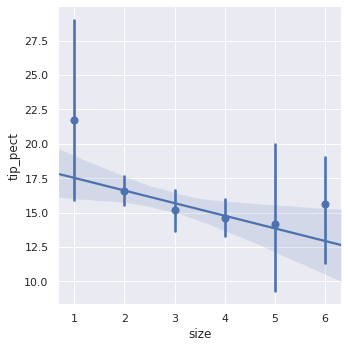

In [40]:
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean)

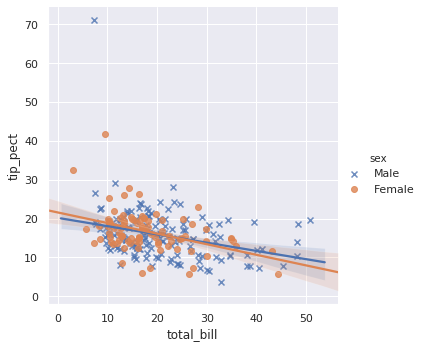

In [41]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

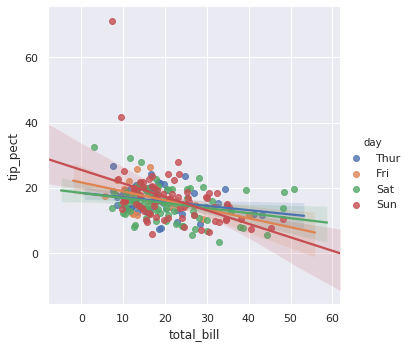

In [42]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

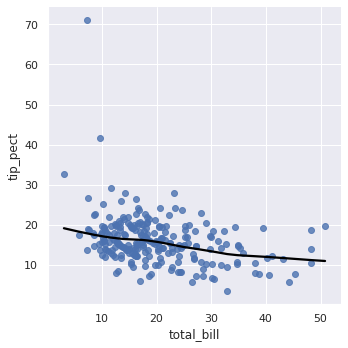

In [43]:
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True, line_kws={'color': 'black'})

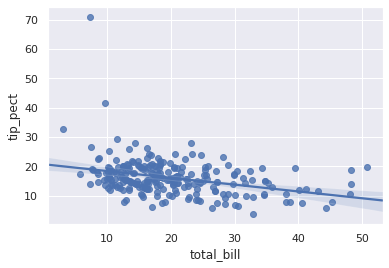

In [44]:
sns.regplot('total_bill', 'tip_pect', tips)

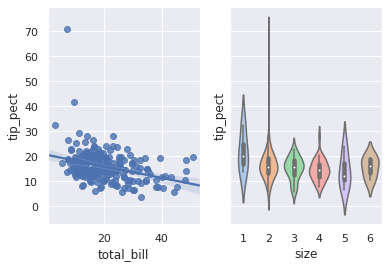

In [45]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)

sns.regplot('total_bill', 'tip_pect', tips, ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips, palette="pastel", ax=axis2)

# Heatmaps and Clustered matrices

In [46]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [47]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')

In [48]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


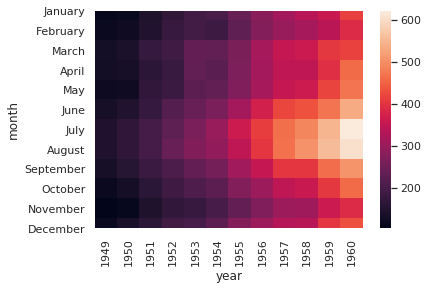

In [49]:
sns.heatmap(flight_dframe)

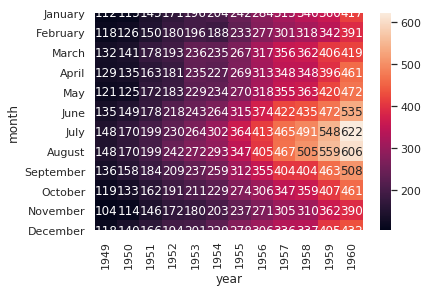

In [50]:
sns.heatmap(flight_dframe, annot=True, fmt='d')

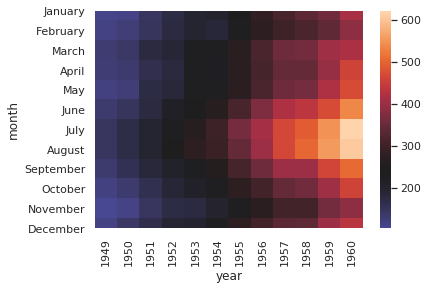

In [51]:
sns.heatmap(flight_dframe, center=flight_dframe.loc['January', 1955])

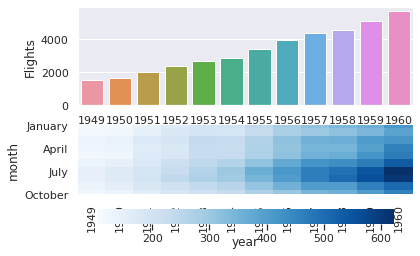

In [52]:
f, (axis1, axis2) = plt.subplots(2, 1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)

sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation': 'horizontal'})

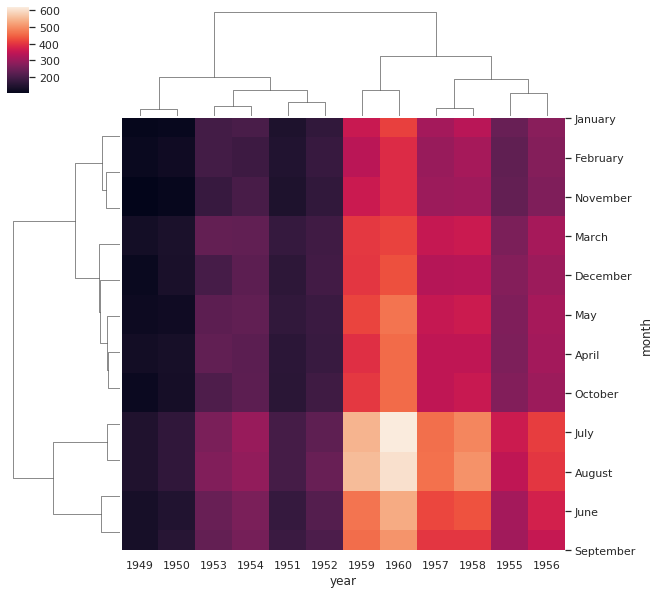

In [53]:
sns.clustermap(flight_dframe)

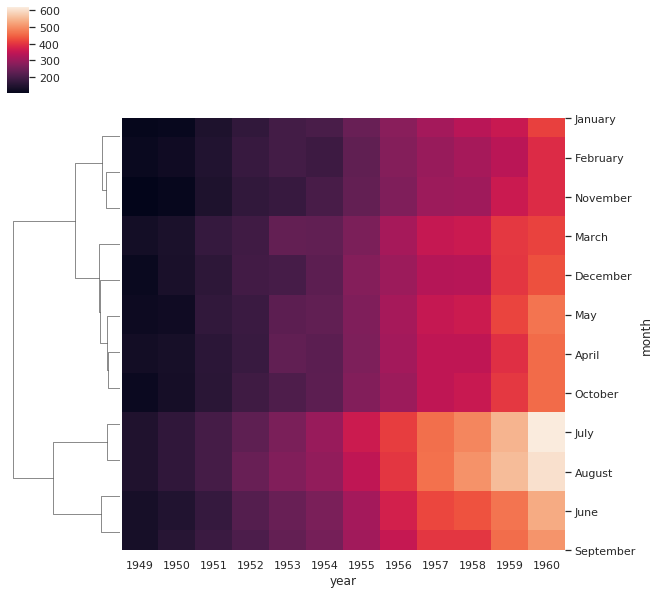

In [54]:
sns.clustermap(flight_dframe, col_cluster=False)

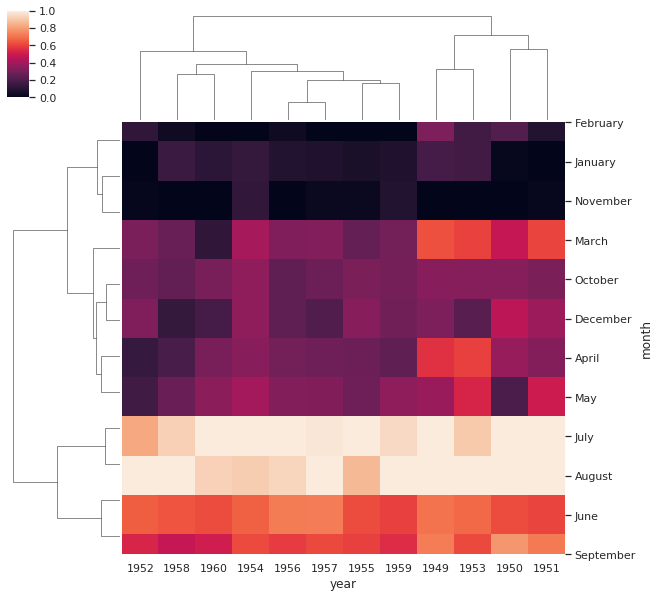

In [55]:
sns.clustermap(flight_dframe, standard_scale=1)

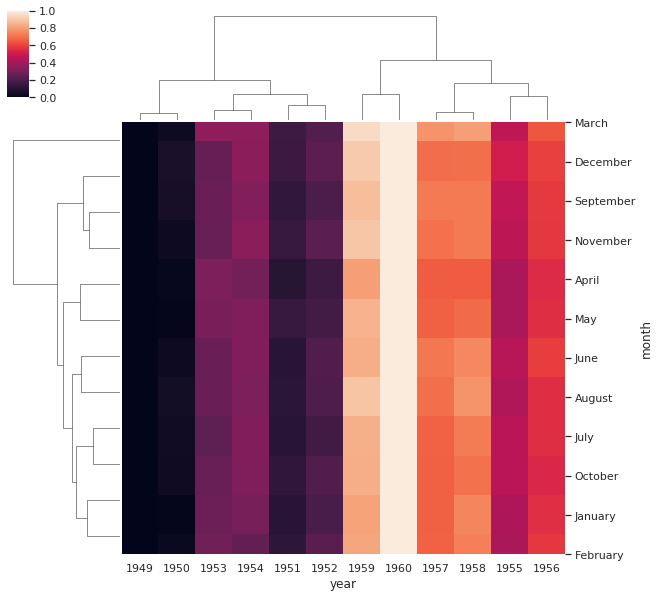

In [56]:
sns.clustermap(flight_dframe, standard_scale=0)

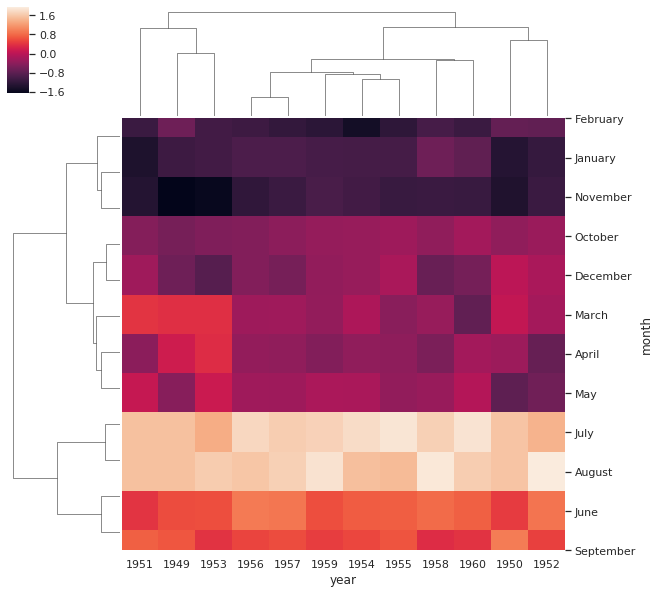

In [57]:
sns.clustermap(flight_dframe, z_score=1)